# Chapter 4 - Outliers w/1 variable

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scistat

In [49]:
covidtotals = pd.read_csv("data/covidtotals.csv")

In [50]:
totvars = ['location', 'total_cases', 'total_deaths',
       'total_cases_pm', 'total_deaths_pm']

demovars = ['population', 'pop_density',
       'median_age', 'gdp_per_capita', 'hosp_beds']

In [51]:
covidtotalsonly = covidtotals.loc[:,totvars]
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.100000e+02,210.000000,210.000000,210.000000
mean,2.921614e+04,1770.714286,1355.357943,55.659129
std,1.363978e+05,8705.565857,2625.277497,144.785816
min,0.000000e+00,0.000000,0.000000,0.000000
25%,1.757500e+02,4.000000,92.541500,0.884750
50%,1.242500e+03,25.500000,280.928500,6.154000
75%,1.011700e+04,241.250000,1801.394750,31.777250
max,1.790191e+06,104383.000000,19771.348000,1237.551000


In [52]:
covidtotalsonly.quantile(np.arange(0.0,1.1,0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,0.0,0.0,0.0000,0.0000
0.1,22.9,0.0,17.9986,0.0000
0.2,105.2,2.0,56.2910,0.3752
0.3,302.0,6.7,115.4341,1.7183
0.4,762.0,12.0,213.9734,3.9566
0.5,1242.5,25.5,280.9285,6.1540
0.6,2514.6,54.6,543.9562,12.2452
0.7,6959.8,137.2,1071.2442,25.9459
0.8,16847.2,323.2,2206.2982,49.9658
0.9,46513.1,1616.9,3765.1363,138.9045


In [53]:
covidtotalsonly.skew()

total_cases        10.804275
total_deaths        8.929816
total_cases_pm      4.396091
total_deaths_pm     4.674417
dtype: float64

In [54]:
covidtotalsonly.kurtosis()

total_cases        134.979577
total_deaths        95.737841
total_cases_pm      25.242790
total_deaths_pm     27.238232
dtype: float64

In [55]:
scistat.shapiro(covidtotalsonly["total_cases"])

(0.19379639625549316, 3.753789128593843e-29)

In [56]:
# p-value
# null hypothesis of a normal distribution can be rejected at the 95% level at any p-value below 0.05
def testnorm(var, df):
    stat, p = scistat.shapiro(df[var])
    return p

In [57]:
testnorm("total_cases", covidtotalsonly)

3.753789128593843e-29

In [58]:
testnorm("total_deaths", covidtotalsonly)

4.3427896631016077e-29

In [59]:
testnorm("total_cases_pm", covidtotalsonly)

1.3972683006509067e-23

Text(0.5,1,'QQ Plot of Total Cases Per Million')

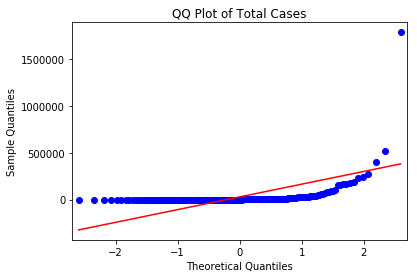

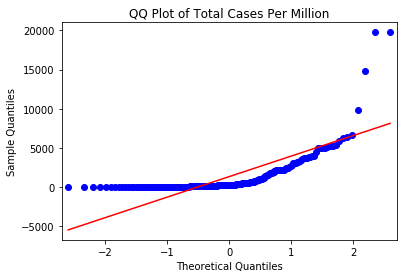

In [61]:
sm.qqplot(covidtotalsonly[["total_cases"]].sort_values(["total_cases"]), line="s")
plt.title("QQ Plot of Total Cases")
sm.qqplot(covidtotalsonly[["total_cases_pm"]].sort_values(["total_cases_pm"]), line="s")
plt.title("QQ Plot of Total Cases Per Million")

In [71]:
thirdq, firstq = covidtotalsonly["total_cases"].quantile(0.75), covidtotalsonly["total_cases"].quantile(0.25) 
interquartilerange = 1.5*(thirdq-firstq)
outlierhigh, outlinerlow = interquartilerange+thirdq, firstq-interquartilerange
print(outlinerlow, outlierhigh, sep=" <--> ")

-14736.125 <--> 25028.875


Text(0,0.5,'Number of Countries')

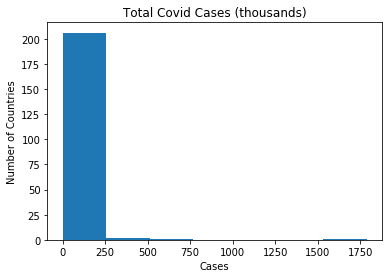

In [80]:
plt.hist(covidtotalsonly["total_cases"]/1000,bins=7)
plt.title("Total Covid Cases (thousands)")
plt.xlabel("Cases")
plt.ylabel("Number of Countries")

(array([ 3., 30., 41., 61., 44., 25.,  6.]),
 array([ 0.        ,  2.05683335,  4.1136667 ,  6.17050004,  8.22733339,
        10.28416674, 12.34100009, 14.39783343]),
 <a list of 7 Patch objects>)

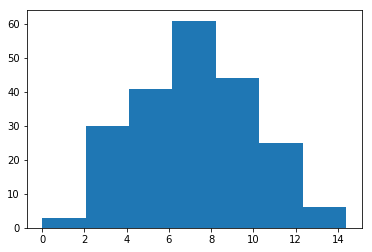

In [93]:
covidlogs = covidtotalsonly.copy()
for col in covidtotalsonly.columns[1:]:
    covidlogs[col] = np.log1p(covidlogs[col])
plt.hist(covidlogs["total_cases"], bins=7)